# Exploratory Data Analysis (EDA) for Diabetes dataset

## EDA

- Useful for understanding data visually.
- determining whether feature scaling is required.
- and more..

### Method summary

1. Outlier detection and removal

2. 1D Histogram plots to understand the distribution of each feature

3. Bee Swarm plots

4. Box/Violin plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("clean_diabetes.csv")

In [3]:
display(data)

Glucose   BMI  Age  Outcome
0        148  33.6   50        1
1         85  26.6   31        0
2        183  23.3   32        1
3         89  28.1   21        0
4        137  43.1   33        1
..       ...   ...  ...      ...
747      101  32.9   63        0
748      122  36.8   27        0
749      121  26.2   30        0
750      126  30.1   47        1
751       93  30.4   23        0

[752 rows x 4 columns]

******

## Outlier detection and removal


- Here we implement two techniques for outlier detection

1. Fitting some analytical function and using a threshold to reject datapoints

2. Using sklearn Local Outlier Factor to identify and reject outliers.

******

### Method 1

0 glucose datapoints should be rejected
4 BMI datapoints should be rejected
4 Age datapoints should be rejected


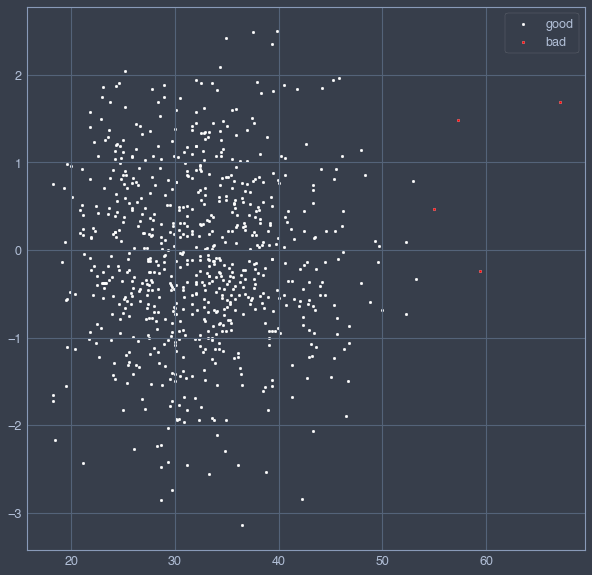

In [4]:
# We extract the features individually and store them as numpy arrays

glucose = data.iloc[:, 0].values
bmi = data.iloc[:, 1].values
age = data.iloc[:, 2].values

# Here we use the Gaussian Normal Distribution as the analytical function
# most data coming from nature follows a normal distribution.

mean_gluc, std_gluc = glucose.mean(), glucose.std()

z_score_1 = np.abs((glucose-mean_gluc)/std_gluc)

mean_bmi, std_bmi = bmi.mean(), bmi.std()

z_score_2 = np.abs((bmi-mean_bmi)/std_bmi)

mean_age, std_age = age.mean(), age.std()

z_score_3 = np.abs((age-mean_age)/std_age)

# We set the minimum rejection z-score

threshold = 3

# boolean masks which define the outliers.

good_1 = z_score_1 < threshold

print(f"{(~good_1).sum()} glucose datapoints should be rejected")

good_2 = z_score_2 < threshold

print(f"{(~good_2).sum()} BMI datapoints should be rejected")

good_3 = z_score_3 < threshold

print(f"{(~good_3).sum()} Age datapoints should be rejected")

# random samples from normal distribution

normal_samples_2 = np.random.normal(size=bmi.size)

# scatter plots

plt.figure(figsize=(10,10))

sns.scatterplot(x=bmi[good_2], y=normal_samples_2[good_2], s = 8, color="white", label="good");

sns.scatterplot(x=bmi[~good_2], y=normal_samples_2[~good_2], s = 8, color="red", label="bad");


## Histograms

In [5]:
# Extracting the feature vectors from the dataframe.

f1 = data.iloc[:, 0]
f2 = data.iloc[:, 1]
f3 = data.iloc[:, 2]
display(f1, f2, f3)

0      148
1       85
2      183
3       89
4      137
      ... 
747    101
748    122
749    121
750    126
751     93
Name: Glucose, Length: 752, dtype: int64

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
747    32.9
748    36.8
749    26.2
750    30.1
751    30.4
Name: BMI, Length: 752, dtype: float64

0      50
1      31
2      32
3      21
4      33
       ..
747    63
748    27
749    30
750    47
751    23
Name: Age, Length: 752, dtype: int64

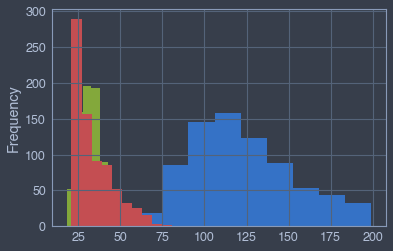

In [6]:
# Here the Histograms are created without manually 
# adjusting the bin width, since EDA is concerned with 
# gaining information visually, we need to refine this 
# further by customizing our bin edges.


plt.hist(f1, label="Glucose")
plt.hist(f2, label="BMI")
plt.hist(f3, label="Age")
plt.ylabel("Frequency")
plt.show();

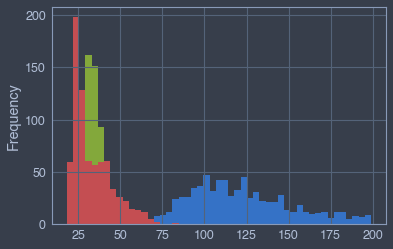

In [7]:
# Here we define the bin-edges using a linear spacing
# and requiring there be 50 numbers in this bin range. 

bins = np.linspace(min(f1.min(), f2.min(), f3.min()), max(f1.max(), f2.max(), f3.max()), 50)

plt.hist(f1, bins = bins, label="Glucose")
plt.hist(f2, bins = bins, label="BMI")
plt.hist(f3, bins = bins, label="Age")
plt.ylabel("Frequency")
plt.show();

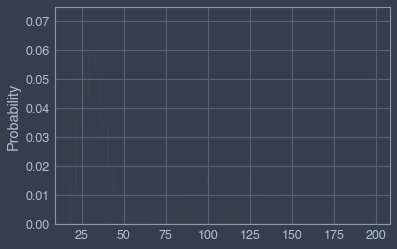

In [8]:
bins = np.linspace(min(f1.min(), f2.min(), f3.min()), max(f1.max(), f2.max(), f3.max()), 50)

plt.hist(f1, bins = bins, histtype = "step", ls=":", density = True, label="Glucose")
plt.hist(f2, bins = bins, histtype = "step", ls=":", density = True,label="BMI")
plt.hist(f3, bins = bins, histtype = "step", ls=":", density = True,label="Age")
plt.ylabel("Probability")
plt.show();

### Box and Violin plots

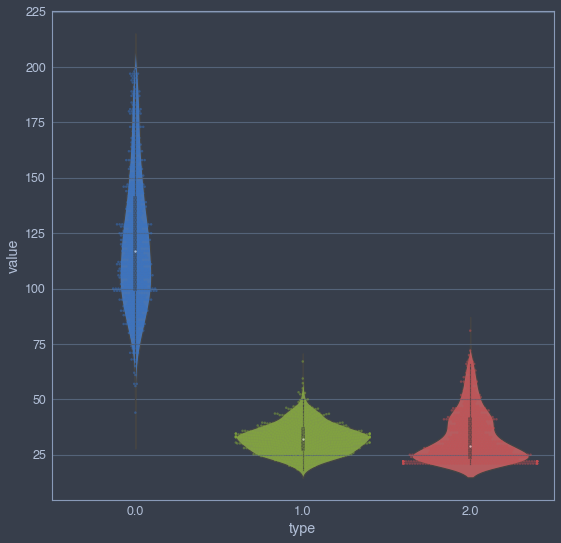

In [11]:
# We need to prepare the data, by converting the
# the datasets we want to analyze into a pandas dataframe
# In the Violin plots type 0 corresponds to f1, type 1 is f2 and type 2 is f3


values = np.concatenate((f1, f2))

values = np.concatenate((values, f3))

types = np.concatenate((np.zeros(f1.shape), np.ones(f2.shape)))

types = np.concatenate((types, np.ones(f3.shape) + 1))

df1 = pd.DataFrame(
    {
        "value": values,
        "type": types 
    })

plt.figure(figsize=(9,9))

sns.violinplot(x="type", y="value", data=df1)
sns.swarmplot(x="type", y="value", data=df1, s = 2.5, alpha = 0.5);
   